## Preprocessing

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

In [ ]:
gdp_growth_df = pd.read_csv("gdp_growth_data.csv")
employment_growth_df = pd.read_csv("quarterly_employment_growth_data.csv")
composite_rate_df = pd.read_csv("composite_rates_data.csv")
vix_df = pd.read_csv("vix_history_data.csv")
financial_stress_df = pd.read_csv("financial_stress_data.csv")
epu_df = pd.read_csv("epu_composite_quarterly.csv")
inflation_df = pd.read_csv("CPIAUCSL.csv")    

In [4]:
inflation_df['observation_date'] = pd.to_datetime(inflation_df['observation_date'])

In [5]:
inflation_df['YearQuarter'] = inflation_df['observation_date'].dt.to_period('Q').astype(str)

In [8]:
inflation_df = inflation_df.resample('Q', on='observation_date').mean().reset_index()
inflation_df.rename(columns={'observation_date': 'YearQuarter'}, inplace=True)
inflation_df['YearQuarter'] = inflation_df['YearQuarter'].dt.to_period('Q').astype(str)
inflation_df

,YearQuarter,CPIAUCSL
0,1947Q1,21.700000
1,1947Q2,22.010000
2,1947Q3,22.490000
3,1947Q4,23.126667
4,1948Q1,23.616667
...,...,...
308,2024Q1,310.974333
309,2024Q2,313.095667
310,2024Q3,314.182667
311,2024Q4,316.538667


In [10]:
inflation_df.to_csv("inflation_data_quarterly.csv", index=False)

In [11]:
financial_stress_df

,observation_date,STLFSI4
0,1993-12-31,-0.3029
1,1994-01-07,-0.3810
2,1994-01-14,-0.1179
3,1994-01-21,-0.3580
4,1994-01-28,-0.2276
...,...,...
1625,2025-02-21,-0.7603
1626,2025-02-28,-0.4514
1627,2025-03-07,-0.3599
1628,2025-03-14,-0.2259


In [12]:
financial_stress_df['observation_date'] = pd.to_datetime(financial_stress_df['observation_date'])
financial_stress_df = financial_stress_df.resample('Q', on='observation_date').mean().reset_index()
financial_stress_df.rename(columns={'observation_date': 'YearQuarter'}, inplace=True)
financial_stress_df['YearQuarter'] = financial_stress_df['YearQuarter'].dt.to_period('Q').astype(str)
financial_stress_df

,YearQuarter,STLFSI4
0,1993Q4,-0.302900
1,1994Q1,-0.282925
2,1994Q2,-0.132815
3,1994Q3,-0.221886
4,1994Q4,-0.196408
...,...,...
121,2024Q1,-0.765900
122,2024Q2,-0.826585
123,2024Q3,-0.526446
124,2024Q4,-0.560485


In [14]:
vix_df.drop(columns=['OPEN','HIGH','LOW'], inplace=True)
vix_df

,DATE,CLOSE
0,01/02/1990,17.24
1,01/03/1990,18.19
2,01/04/1990,19.22
3,01/05/1990,20.11
4,01/08/1990,20.26
...,...,...
8889,03/21/2025,19.28
8890,03/24/2025,17.48
8891,03/25/2025,17.15
8892,03/26/2025,18.33


In [15]:
vix_df['DATE'] = pd.to_datetime(vix_df['DATE'])
vix_df = vix_df.resample('Q', on='DATE').mean().reset_index()
vix_df.rename(columns={'DATE': 'YearQuarter'}, inplace=True)
vix_df['YearQuarter'] = vix_df['YearQuarter'].dt.to_period('Q').astype(str)
vix_df

,YearQuarter,CLOSE
0,1990Q1,22.174603
1,1990Q2,18.722063
2,1990Q3,25.195556
3,1990Q4,26.113281
4,1991Q1,22.515833
...,...,...
136,2024Q1,13.712540
137,2024Q2,13.980308
138,2024Q3,17.066667
139,2024Q4,17.363231


In [18]:
composite_rate_df.drop(columns=['month_time','composite_rates_diff'], inplace=True)
composite_rate_df

,composite_rates,Date
0,7.95,1990-01-01
1,7.80,1990-02-01
2,7.95,1990-03-01
3,8.14,1990-04-01
4,7.77,1990-05-01
...,...,...
417,4.83,2024-10-01
418,4.64,2024-11-01
419,4.48,2024-12-01
420,4.33,2025-01-01


In [19]:
composite_rate_df['Date'] = pd.to_datetime(composite_rate_df['Date'])
composite_rate_df = composite_rate_df.resample('Q', on='Date').mean().reset_index()
composite_rate_df.rename(columns={'Date': 'YearQuarter'}, inplace=True)
composite_rate_df['YearQuarter'] = composite_rate_df['YearQuarter'].dt.to_period('Q').astype(str)
composite_rate_df

,YearQuarter,composite_rates
0,1990Q1,7.900000
1,1990Q2,7.860000
2,1990Q3,7.530000
3,1990Q4,7.096667
4,1991Q1,6.083333
...,...,...
136,2024Q1,5.330000
137,2024Q2,5.330000
138,2024Q3,5.263333
139,2024Q4,4.650000


In [20]:
gdp_growth_df

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
0,1000,1,All industry total,2005:Q1,195673.0,alabama,2005 Q1,NaN
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
...,...,...,...,...,...,...,...,...
2365,55000,1,All industry total,2023:Q3,346067.0,wisconsin,2023 Q3,0.013137
2366,55000,1,All industry total,2023:Q4,350266.1,wisconsin,2023 Q4,0.012134
2367,55000,1,All industry total,2024:Q1,349300.9,wisconsin,2024 Q1,-0.002756
2368,55000,1,All industry total,2024:Q2,352941.1,wisconsin,2024 Q2,0.010421


In [49]:
filtered_inflation_df = inflation_df[(inflation_df['YearQuarter'] >= '2005Q2') & (inflation_df['YearQuarter'] <= '2008Q2')]
filtered_inflation_df

,YearQuarter,CPIAUCSL,diff_CPIAUCSL
233,2005Q2,193.666667,1.300000
234,2005Q3,196.600000,2.933333
235,2005Q4,198.433333,1.833333
236,2006Q1,199.466667,1.033333
237,2006Q2,201.266667,1.800000
238,2006Q3,203.166667,1.900000
239,2006Q4,202.333333,-0.833333
240,2007Q1,204.317000,1.983667
241,2007Q2,206.631000,2.314000
242,2007Q3,207.939000,1.308000


In [38]:
filtered_vix_df = vix_df[(vix_df['YearQuarter'] >= '2005Q2') & (vix_df['YearQuarter'] <= '2008Q2')]
filtered_vix_df

,YearQuarter,CLOSE,diff_CLOSE
61,2005Q2,13.407344,0.620295
62,2005Q3,12.250781,-1.156563
63,2005Q4,12.781746,0.530965
64,2006Q1,12.042419,-0.739327
65,2006Q2,14.528730,2.486311
66,2006Q3,13.607937,-0.920794
67,2006Q4,11.034921,-2.573016
68,2007Q1,12.563607,1.528686
69,2007Q2,13.731905,1.168298
70,2007Q3,21.589206,7.857302


In [ ]:
gdp_growth_df.drop(columns=['Description','LineCode','GeoFips','Time'], inplace=True)


In [27]:
gdp_growth_df.dropna(inplace=True)

In [28]:
gdp_growth_df

,GDP,State,YearQuarter,gdp_growth
1,197495.8,alabama,2005 Q2,0.009316
2,196798.5,alabama,2005 Q3,-0.003531
3,199018.6,alabama,2005 Q4,0.011281
4,199142.9,alabama,2006 Q1,0.000625
5,200031.3,alabama,2006 Q2,0.004461
...,...,...,...,...
2365,346067.0,wisconsin,2023 Q3,0.013137
2366,350266.1,wisconsin,2023 Q4,0.012134
2367,349300.9,wisconsin,2024 Q1,-0.002756
2368,352941.1,wisconsin,2024 Q2,0.010421


In [30]:
filtered_gdp_growth_df = gdp_growth_df[gdp_growth_df['YearQuarter'] <= '2008 Q2']
filtered_gdp_growth_df

,GDP,State,YearQuarter,gdp_growth
1,197495.8,alabama,2005 Q2,0.009316
2,196798.5,alabama,2005 Q3,-0.003531
3,199018.6,alabama,2005 Q4,0.011281
4,199142.9,alabama,2006 Q1,0.000625
5,200031.3,alabama,2006 Q2,0.004461
...,...,...,...,...
2300,289401.7,wisconsin,2007 Q2,0.002859
2301,290829.8,wisconsin,2007 Q3,0.004935
2302,290612.7,wisconsin,2007 Q4,-0.000746
2303,288584.9,wisconsin,2008 Q1,-0.006978


In [31]:
filtered_composite_rate_df = composite_rate_df[(composite_rate_df['YearQuarter'] >= '2005Q2') & (composite_rate_df['YearQuarter'] <= '2008Q2')]
filtered_composite_rate_df

,YearQuarter,composite_rates
61,2005Q2,3.183333
62,2005Q3,3.783333
63,2005Q4,4.296667
64,2006Q1,4.633333
65,2006Q2,5.080000
66,2006Q3,5.193333
67,2006Q4,5.150000
68,2007Q1,5.150000
69,2007Q2,5.110000
70,2007Q3,4.650000


In [45]:
filtered_financial_stress_df = financial_stress_df[(financial_stress_df['YearQuarter'] >= '2005Q2') & (financial_stress_df['YearQuarter'] <= '2008Q2')]
filtered_financial_stress_df

,YearQuarter,STLFSI4,diff_STLFSI4,growth_STLFSI4
46,2005Q2,-0.704938,0.138337,-0.164047
47,2005Q3,-0.837471,-0.132533,0.188006
48,2005Q4,-0.758223,0.079248,-0.094628
49,2006Q1,-1.003262,-0.245038,0.323175
50,2006Q2,-0.939169,0.064092,-0.063884
51,2006Q3,-0.906669,0.032500,-0.034605
52,2006Q4,-0.948046,-0.041377,0.045636
53,2007Q1,-0.989154,-0.041108,0.043360
54,2007Q2,-0.891215,0.097938,-0.099012
55,2007Q3,0.432654,1.323869,-1.485465


In [34]:
employment_growth_df

,State,YearQuarter,employment_growth
0,alabama,2005 Q1,0.001514
1,alabama,2005 Q2,0.002355
2,alabama,2005 Q3,0.001631
3,alabama,2005 Q4,0.000867
4,alabama,2006 Q1,0.001524
...,...,...,...
2365,wisconsin,2023 Q3,0.000662
2366,wisconsin,2023 Q4,0.000710
2367,wisconsin,2024 Q1,0.000387
2368,wisconsin,2024 Q2,0.000688


In [35]:
filtered_employment_growth_df = employment_growth_df[(employment_growth_df['YearQuarter'] >= '2005 Q2') & (employment_growth_df['YearQuarter'] <= '2008 Q2')]
filtered_employment_growth_df

,State,YearQuarter,employment_growth
1,alabama,2005 Q2,0.002355
2,alabama,2005 Q3,0.001631
3,alabama,2005 Q4,0.000867
4,alabama,2006 Q1,0.001524
5,alabama,2006 Q2,0.001940
...,...,...,...
2300,wisconsin,2007 Q2,-0.000170
2301,wisconsin,2007 Q3,0.000146
2302,wisconsin,2007 Q4,0.001023
2303,wisconsin,2008 Q1,0.001108


In [37]:
vix_df = vix_df.sort_values("YearQuarter").reset_index(drop=True)
vix_df["diff_CLOSE"] = vix_df["CLOSE"].diff()
vix_df

,YearQuarter,CLOSE,diff_CLOSE
0,1990Q1,22.174603,NaN
1,1990Q2,18.722063,-3.452540
2,1990Q3,25.195556,6.473492
3,1990Q4,26.113281,0.917726
4,1991Q1,22.515833,-3.597448
...,...,...,...
136,2024Q1,13.712540,-1.573710
137,2024Q2,13.980308,0.267768
138,2024Q3,17.066667,3.086359
139,2024Q4,17.363231,0.296564


In [39]:
from arch.unitroot import PhillipsPerron

# Run PP test on diff_CLOSE column
pp_test_diff_close = PhillipsPerron(filtered_vix_df['diff_CLOSE'].dropna())
print(pp_test_diff_close.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.291
P-value                         0.015
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -4.14 (1%), -3.15 (5%), -2.71 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [40]:
pp_test_financial_stress = PhillipsPerron(filtered_financial_stress_df['STLFSI4'])
print(pp_test_financial_stress.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.276
P-value                         0.976
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -4.14 (1%), -3.15 (5%), -2.71 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [44]:
financial_stress_df['growth_STLFSI4'] = financial_stress_df['STLFSI4'].pct_change()
financial_stress_df

,YearQuarter,STLFSI4,diff_STLFSI4,growth_STLFSI4
0,1993Q4,-0.302900,NaN,NaN
1,1994Q1,-0.282925,0.019975,-0.065946
2,1994Q2,-0.132815,0.150110,-0.530563
3,1994Q3,-0.221886,-0.089070,0.670633
4,1994Q4,-0.196408,0.025478,-0.114825
...,...,...,...,...
121,2024Q1,-0.765900,-0.241846,0.461491
122,2024Q2,-0.826585,-0.060685,0.079233
123,2024Q3,-0.526446,0.300138,-0.363107
124,2024Q4,-0.560485,-0.034038,0.064657


In [46]:
pp_test_growth_financial_stress = PhillipsPerron(filtered_financial_stress_df['growth_STLFSI4'].dropna())
print(pp_test_growth_financial_stress.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.734
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -4.14 (1%), -3.15 (5%), -2.71 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [50]:
pp_test_inflation = PhillipsPerron(filtered_inflation_df['diff_CPIAUCSL'].dropna())
print(pp_test_inflation.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.425
P-value                         0.010
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -4.14 (1%), -3.15 (5%), -2.71 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [48]:
inflation_df['diff_CPIAUCSL'] = inflation_df['CPIAUCSL'].diff()
print(inflation_df.head())

  YearQuarter   CPIAUCSL  diff_CPIAUCSL
0      1947Q1  21.700000            NaN
1      1947Q2  22.010000       0.310000
2      1947Q3  22.490000       0.480000
3      1947Q4  23.126667       0.636667
4      1948Q1  23.616667       0.490000


In [51]:
failed_states = []

for state, group in employment_growth_df.groupby("State"):
    # drop NA and run the Phillips-Perron test on employment_growth series for the state
    series = group["employment_growth"].dropna()
    test = PhillipsPerron(series)
    # if p-value is >= 0.05, we fail to reject the null (non-stationary)
    if test.pvalue > 0.05:
        failed_states.append(state)

print("States that fail the stationarity test at 0.05 significance level:")
print(failed_states)

States that fail the stationarity test at 0.05 significance level:
[]


In [53]:
failed_epu_states = []

for state, group in epu_df.groupby("State"):
    series = group["EPU_value_Quarterly"].dropna()
    test = PhillipsPerron(series)
    if test.pvalue > 0.05:
        failed_epu_states.append(state)

print("States that fail the stationarity test at 0.05 significance level for EPU:")
print(failed_epu_states)

States that fail the stationarity test at 0.05 significance level for EPU:
[]


In [73]:
gdp_growth_df = pd.read_csv("gdp_growth_data.csv")

In [74]:
gdp_growth_df

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
0,1000,1,All industry total,2005:Q1,195673.0,alabama,2005 Q1,NaN
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
...,...,...,...,...,...,...,...,...
2365,55000,1,All industry total,2023:Q3,346067.0,wisconsin,2023 Q3,0.013137
2366,55000,1,All industry total,2023:Q4,350266.1,wisconsin,2023 Q4,0.012134
2367,55000,1,All industry total,2024:Q1,349300.9,wisconsin,2024 Q1,-0.002756
2368,55000,1,All industry total,2024:Q2,352941.1,wisconsin,2024 Q2,0.010421


In [76]:
# Add natural logarithm of GDP column to gdp_growth_df
gdp_growth_df['ln_GDP'] = np.log(gdp_growth_df['GDP'])

In [77]:

failed_lnGDP_states = []

for state, group in gdp_growth_df.groupby("State"):
    # drop NA values in ln_GDP series
    series = group['ln_GDP'].dropna()
    test_result = PhillipsPerron(series)
    # if p-value >= 0.05, fail to reject the null (non-stationary)
    if test_result.pvalue > 0.05:
        failed_lnGDP_states.append(state)
        print(f"{state}: p-value = {test_result.pvalue:.3f} (non-stationary)")
        
print("\nStates that fail the stationarity test on ln_GDP:")
print(failed_lnGDP_states)

alabama: p-value = 0.998 (non-stationary)
california: p-value = 0.985 (non-stationary)
colorado: p-value = 0.996 (non-stationary)
connecticut: p-value = 0.190 (non-stationary)
florida: p-value = 0.998 (non-stationary)
georgia: p-value = 0.995 (non-stationary)
idaho: p-value = 0.999 (non-stationary)
illinois: p-value = 0.884 (non-stationary)
indiana: p-value = 0.985 (non-stationary)
iowa: p-value = 0.807 (non-stationary)
kansas: p-value = 0.801 (non-stationary)
kentucky: p-value = 0.958 (non-stationary)
louisiana: p-value = 0.125 (non-stationary)
maine: p-value = 0.999 (non-stationary)
maryland: p-value = 0.872 (non-stationary)
michigan: p-value = 0.876 (non-stationary)
missouri: p-value = 0.994 (non-stationary)
montana: p-value = 0.986 (non-stationary)
nebraska: p-value = 0.929 (non-stationary)
ohio: p-value = 0.981 (non-stationary)
oklahoma: p-value = 0.614 (non-stationary)
oregon: p-value = 0.960 (non-stationary)
pennsylvania: p-value = 0.893 (non-stationary)
tennessee: p-value = 0.9

In [56]:
merged_df = filtered_employment_growth_df.merge(
    filtered_gdp_growth_df, on=["State", "YearQuarter"]
).merge(
    filtered_epu_df, on=["State", "YearQuarter"]
)
merged_df.head()

,State,YearQuarter,employment_growth,GDP,gdp_growth,EPU_value_Quarterly
0,alabama,2005 Q2,0.002355,197495.8,0.009316,109.191947
1,alabama,2005 Q3,0.001631,196798.5,-0.003531,107.750311
2,alabama,2005 Q4,0.000867,199018.6,0.011281,63.529916
3,alabama,2006 Q1,0.001524,199142.9,0.000625,58.269703
4,alabama,2006 Q2,0.001940,200031.3,0.004461,90.094876


In [55]:
filtered_epu_df = epu_df[(epu_df['YearQuarter'] >= '2005 Q2') & (epu_df['YearQuarter'] <= '2008 Q2')]
filtered_epu_df

,State,YearQuarter,EPU_value_Quarterly
21,alabama,2005 Q2,109.191947
22,alabama,2005 Q3,107.750311
23,alabama,2005 Q4,63.529916
24,alabama,2006 Q1,58.269703
25,alabama,2006 Q2,90.094876
...,...,...,...
4029,wisconsin,2007 Q2,33.323474
4030,wisconsin,2007 Q3,64.968037
4031,wisconsin,2007 Q4,81.479058
4032,wisconsin,2008 Q1,146.533058


In [57]:
# Align the YearQuarter format in merged_df to remove spaces so it matches the other dataframes
merged_df["YearQuarter"] = merged_df["YearQuarter"].str.replace(" ", "")

final_df = (
    merged_df.merge(filtered_composite_rate_df[["YearQuarter", "composite_rates"]], on="YearQuarter", how="left")
             .merge(filtered_financial_stress_df[["YearQuarter", "growth_STLFSI4"]], on="YearQuarter", how="left")
             .merge(filtered_vix_df[["YearQuarter", "diff_CLOSE"]], on="YearQuarter", how="left")
             .merge(filtered_inflation_df[["YearQuarter", "diff_CPIAUCSL"]], on="YearQuarter", how="left")
)

final_df

,State,YearQuarter,employment_growth,GDP,gdp_growth,EPU_value_Quarterly,composite_rates,growth_STLFSI4,diff_CLOSE,diff_CPIAUCSL
0,alabama,2005Q2,0.002355,197495.8,0.009316,109.191947,3.183333,-0.164047,0.620295,1.300000
1,alabama,2005Q3,0.001631,196798.5,-0.003531,107.750311,3.783333,0.188006,-1.156563,2.933333
2,alabama,2005Q4,0.000867,199018.6,0.011281,63.529916,4.296667,-0.094628,0.530965,1.833333
3,alabama,2006Q1,0.001524,199142.9,0.000625,58.269703,4.633333,0.323175,-0.739327,1.033333
4,alabama,2006Q2,0.001940,200031.3,0.004461,90.094876,5.080000,-0.063884,2.486311,1.800000
...,...,...,...,...,...,...,...,...,...,...
385,wisconsin,2007Q2,-0.000170,289401.7,0.002859,33.323474,5.110000,-0.099012,1.168298,2.314000
386,wisconsin,2007Q3,0.000146,290829.8,0.004935,64.968037,4.650000,-1.485465,7.857302,1.308000
387,wisconsin,2007Q4,0.001023,290612.7,-0.000746,81.479058,3.893333,1.846706,0.440637,2.550667
388,wisconsin,2008Q1,0.001108,288584.9,-0.006978,146.533058,2.223333,0.250648,4.090320,2.280000


In [58]:
final_df.to_csv("final_data.csv", index=False)

## VAR 

In [64]:
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
import numpy as np
import pandas as pd
import warnings

import statsmodels.api as sm

# Suppress warnings
warnings.filterwarnings('ignore')

# Create columns to normalize list
columns_to_normalize = [
    'employment_growth', 
    'EPU_value_Quarterly', 
    'composite_rates', 
    'growth_STLFSI4', 
    'diff_CLOSE', 
    'diff_CPIAUCSL', 
    'gdp_growth'
]

# Create empty dictionaries to store results
var_results = {}
bic_lags = {}
failed_states = []

# Normalize variables
scaler = StandardScaler()
for col in columns_to_normalize:
    final_df[f'{col}_norm'] = scaler.fit_transform(final_df[[col]])

# Get list of unique states
states = final_df['State'].unique()

# Run VAR for each state
for state in states:
    # Filter data for current state
    state_data = final_df[final_df['State'] == state]
    
    # Select normalized columns
    endog = state_data[[col + '_norm' for col in columns_to_normalize]]
    
    # Check if we have enough observations
    min_obs_required = len(columns_to_normalize) * 2  # Rule of thumb: at least 2 observations per variable
    
    if len(endog) <= min_obs_required:
        print(f"Skipping {state}: insufficient observations ({len(endog)} available, {min_obs_required} required)")
        failed_states.append(state)
        continue
    
    try:
        # Create VAR model
        model = VAR(endog)
        
        # Find optimal lag order using BIC
        # Ensure max_lags doesn't exceed what the data can support
        max_lags = max(1, min(4, (len(endog) - len(columns_to_normalize) - 2) // len(columns_to_normalize)))
        results = model.select_order(maxlags=max_lags)
        bic_lag = results.bic
        
        # Store BIC lag for this state
        bic_lags[state] = bic_lag
        
        # Fit VAR model with BIC lag
        var_fit = model.fit(bic_lag)
        
        # Store results
        var_results[state] = var_fit
        print(f"Successfully fitted VAR model for {state} with {bic_lag} lags")
    
    except Exception as e:
        print(f"Error fitting VAR model for {state}: {e}")
        failed_states.append(state)

# Create results dataframe only if we have successful models
results_df = pd.DataFrame(columns=['State', 'BIC_Lag', 'Variables', 'Coefficient', 'Std Error', 'P-Value', 'CI_Lower', 'CI_Upper'])

for state, var_fit in var_results.items():
    bic_lag = bic_lags[state]
    
    for i, col in enumerate([col + '_norm' for col in columns_to_normalize]):
        for j in range(1, bic_lag + 1):
            for k, endogenous in enumerate([col + '_norm' for col in columns_to_normalize]):
                coef = var_fit.params[f'L{j}.{endogenous}'][i] 
                std_err = var_fit.stderr[f'L{j}.{endogenous}'][i]
                t_stat = coef / std_err if std_err != 0 else float('nan')
                p_value = 2 * (1 - abs(sm.distributions.norm.cdf(t_stat)))
                ci_lower = coef - 1.96 * std_err
                ci_upper = coef + 1.96 * std_err
                
                results_df = pd.concat([
                    results_df,
                    pd.DataFrame({
                        'State': [state],
                        'BIC_Lag': [bic_lag],
                        'Variables': [f'{col} ~ L{j}.{endogenous}'],
                        'Coefficient': [coef],
                        'Std Error': [std_err],
                        'P-Value': [p_value],
                        'CI_Lower': [ci_lower],
                        'CI_Upper': [ci_upper]
                    })
                ], ignore_index=True)

# Display the BIC lag for each state
print("\nBIC Lags by State:")
for state, lag in bic_lags.items():
    print(f"{state}: {lag}")

# Report on failed states
if failed_states:
    print(f"\nStates that couldn't be modeled ({len(failed_states)}): {', '.join(failed_states)}")

# Display summary statistics for successful states
if var_results:
    print("\nSummary Statistics:")
    grouped = results_df.groupby('State')
    for state, group in grouped:
        print(f"\n{state} (BIC Lag: {bic_lags[state]}):")
        state_summary = group.describe()['Coefficient'].loc[['mean', 'std', 'min', 'max']]
        print(state_summary)

    # Save detailed results to CSV
    results_df.to_csv("var_results_by_state.csv", index=False)
    print("\nDetailed results saved to 'var_results_by_state.csv'")
else:
    print("\nNo successful VAR models to report.")

Skipping alabama: insufficient observations (13 available, 14 required)
Skipping alaska: insufficient observations (13 available, 14 required)
Skipping california: insufficient observations (13 available, 14 required)
Skipping colorado: insufficient observations (13 available, 14 required)
Skipping connecticut: insufficient observations (13 available, 14 required)
Skipping florida: insufficient observations (13 available, 14 required)
Skipping georgia: insufficient observations (13 available, 14 required)
Skipping idaho: insufficient observations (13 available, 14 required)
Skipping illinois: insufficient observations (13 available, 14 required)
Skipping indiana: insufficient observations (13 available, 14 required)
Skipping iowa: insufficient observations (13 available, 14 required)
Skipping kansas: insufficient observations (13 available, 14 required)
Skipping kentucky: insufficient observations (13 available, 14 required)
Skipping louisiana: insufficient observations (13 available, 

In [72]:
# --- List of VAR variables ---
var_columns = [
    "employment_growth",
    "EPU_value_Quarterly",
    "composite_rates",
    "growth_STLFSI4",
    "diff_CLOSE",
    "diff_CPIAUCSL",
    "gdp_growth",
]

# --- Loop over each state ---
for state in final_df["State"].unique():
    # 1) Subset & sort
    df_state = (
        final_df[final_df["State"] == state]
        .dropna(subset=var_columns + ["YQ"])
        .sort_values("YQ")
        .set_index("YQ")
    )
    T = len(df_state)
    k = len(var_columns)
    # 2) Determine maxlags ≤ 2 and estimable
    maxlags = min(2, (T - 1) // k)
    if maxlags < 1:
        print(f"⚠️ {state}: only {T} obs, cannot fit VAR with any lag")
        continue

    # 3) Normalize the series
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(
        scaler.fit_transform(df_state[var_columns]),
        index=df_state.index,
        columns=var_columns
    )

    # 4) Select lag by BIC (up to maxlags)
    model = VAR(data_scaled)
    sel = model.select_order(maxlags=maxlags)
    p = sel.bic
    print(f"\nSTATE: {state} | selected lag p = {p}")

    # 5) Fit VAR(p)
    res = model.fit(p)

    # 6) Output results
    print("\nCoefficients:\n", res.params)
    print("\nStd. errors:\n", res.stderr)
    print("\nP‑values:\n", res.pvalues)
    print("\n95% Confidence Intervals:\n", res.conf_int())

ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.

In [78]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [79]:
var_columns = [
    'employment_growth', 
    'EPU_value_Quarterly', 
    'composite_rates', 
    'growth_STLFSI4', 
    'diff_CLOSE', 
    'diff_CPIAUCSL',
    'gdp_growth'
]

# Function to normalize data
def normalize_data(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data, scaler

# Function to run VAR for a specific state
def run_state_var(state_df, max_lags=4):
    # Extract the variables for VAR
    data = state_df[var_columns].copy()
    
    # Check for NaN values
    if data.isnull().any().any():
        data = data.fillna(method='ffill')  # Forward fill
        data = data.fillna(method='bfill')  # Backward fill for any remaining NaNs
    
    # Normalize the data
    normalized_data, scaler = normalize_data(data)
    normalized_df = pd.DataFrame(normalized_data, columns=var_columns, index=data.index)
    
    # Determine optimal lag order using information criteria
    try:
        var_model = VAR(normalized_df)
        lag_order = var_model.select_order(maxlags=max_lags)
        selected_lag = lag_order.aic  # Using AIC criteria
        if selected_lag == 0:  # If AIC suggests 0 lags, use at least 1
            selected_lag = 1
    except:
        selected_lag = 1  # Default to 1 if there's an issue
    
    # Fit the VAR model with the selected lag
    fitted_model = var_model.fit(selected_lag)
    
    # Extract results
    coefficients = fitted_model.params
    std_errors = fitted_model.stderr
    p_values = fitted_model.pvalues
    
    # Calculate confidence intervals (95%)
    lower_ci = coefficients - 1.96 * std_errors
    upper_ci = coefficients + 1.96 * std_errors
    
    # Create output dictionary
    results = {
        'lag_order': selected_lag,
        'coefficients': coefficients,
        'std_errors': std_errors,
        'p_values': p_values,
        'lower_ci': lower_ci,
        'upper_ci': upper_ci,
        'model': fitted_model
    }
    
    return results

# Main function to process all states
def process_all_states(df):
    # Get unique states
    states = df['State'].unique()
    
    # Dictionary to store results for each state
    all_results = {}
    
    for state in states:
        print(f"Processing state: {state}")
        state_df = df[df['State'] == state].sort_values('YearQuarter')
        
        # Check if we have enough observations for this state
        if len(state_df) < 10:  # Minimum number for meaningful VAR
            print(f"  Too few observations for {state} ({len(state_df)}), skipping.")
            continue
        
        try:
            state_results = run_state_var(state_df)
            all_results[state] = state_results
            
            # Print summary for this state
            print(f"  Lag order: {state_results['lag_order']}")
            print(f"  Variables: {var_columns}")
            print("  --------------------------------------")
            
            # Create detailed summary for this state
            create_state_summary(state, state_results)
            
        except Exception as e:
            print(f"  Error processing {state}: {str(e)}")
    
    return all_results

# Function to create a detailed summary for each state
def create_state_summary(state, results):
    model = results['model']
    coef = results['coefficients']
    stderr = results['std_errors']
    pvalues = results['p_values']
    lower_ci = results['lower_ci']
    upper_ci = results['upper_ci']
    
    print(f"\nDetailed Results for {state}:")
    print("=====================================")
    
    # Print information about each equation
    for i, variable in enumerate(var_columns):
        print(f"\nEquation for {variable}:")
        print("-" * 40)
        
        # Get coefficients for this equation
        var_coef = coef.iloc[:, i]
        var_stderr = stderr.iloc[:, i]
        var_pvalues = pvalues.iloc[:, i]
        var_lower_ci = lower_ci.iloc[:, i]
        var_upper_ci = upper_ci.iloc[:, i]
        
        # Create a DataFrame for pretty printing
        results_df = pd.DataFrame({
            'Coefficient': var_coef.values,
            'Std Error': var_stderr.values,
            'P-value': var_pvalues.values,
            'Lower CI (95%)': var_lower_ci.values,
            'Upper CI (95%)': var_upper_ci.values
        }, index=var_coef.index)
        
        # Print with formatting
        pd.set_option('display.max_rows', None)
        pd.set_option('display.width', 120)
        print(results_df)
    
    # Print model summary information
    print("\nModel Summary:")
    print("-" * 40)
    print(f"Lag Order: {results['lag_order']}")
    print(f"AIC: {model.aic}")
    print(f"BIC: {model.bic}")
    print(f"FPE: {model.fpe}")
    print(f"HQIC: {model.hqic}")
    print("=====================================\n")

# Execute the analysis
if _name_ == "_main_":
    # Process all states
    results = process_all_states(df)
    print(f"Completed VAR analysis for {len(results)} states")
    
    # Save results to a file
    with open('var_analysis_results.txt', 'w') as f:
        for state, state_results in results.items():
            f.write(f"\n\nResults for {state}:\n")
            f.write("=" * 50 + "\n")
            
            # Write basic info
            f.write(f"Lag order: {state_results['lag_order']}\n")
            f.write(f"AIC: {state_results['model'].aic}\n")
            f.write(f"BIC: {state_results['model'].bic}\n\n")
            
            # Write coefficients, std errors, p-values and CIs for each equation
            for i, variable in enumerate(var_columns):
                f.write(f"\nEquation for {variable}:\n")
                f.write("-" * 40 + "\n")
                
                var_coef = state_results['coefficients'].iloc[:, i]
                var_stderr = state_results['std_errors'].iloc[:, i]
                var_pvalues = state_results['p_values'].iloc[:, i]
                var_lower_ci = state_results['lower_ci'].iloc[:, i]
                var_upper_ci = state_results['upper_ci'].iloc[:, i]
                
                results_df = pd.DataFrame({
                    'Coefficient': var_coef.values,
                    'Std Error': var_stderr.values,
                    'P-value': var_pvalues.values,
                    'Lower CI (95%)': var_lower_ci.values,
                    'Upper CI (95%)': var_upper_ci.values
                }, index=var_coef.index)
                
                f.write(results_df.to_string() + "\n\n")
    
    print("\nDetailed results have been saved to 'var_analysis_results.txt'")
    
    # Additional function to visualize impulse responses for a specific state if needed
    def plot_impulse_response(state, state_results, periods=10):
        print(f"Generating impulse response plots for {state}...")
        model = state_results['model']
        
        # Generate impulse responses
        irf = model.irf(periods)
        
        # Set up the plotting grid
        n_vars = len(var_columns)
        fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 12))
        fig.suptitle(f'Impulse Response Analysis for {state}', fontsize=16)
        
        # Plot impulse responses
        for i, j in product(range(n_vars), range(n_vars)):
            ax = axes[i, j]
            ax.plot(range(periods+1), irf[:, i, j])
            ax.set_xlabel('Periods')
            ax.set_title(f'{var_columns[j]} → {var_columns[i]}')
            ax.axhline(y=0, color='r', linestyle='-', alpha=0.3)
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.savefig(f'{state}_impulse_responses.png')
        plt.close()
        
        print(f"Saved impulse response plot for {state}")
    
    # Uncomment the following code to generate impulse response plots for specific states
    """
    # Select specific states to plot or use a small subset
    plot_states = ['California', 'New York', 'Texas']
    for state in plot_states:
        if state in results:
            plot_impulse_response(state, results[state])
    """

NameError: name '_name_' is not defined

In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from itertools import product

# 1) your seven vars
var_columns = [
    'employment_growth',
    'EPU_value_Quarterly',
    'composite_rates',
    'growth_STLFSI4',
    'diff_CLOSE',
    'diff_CPIAUCSL',
    'gdp_growth'
]

# --- normalize a DataFrame of only those columns
def normalize_data(df):
    scaler = StandardScaler()
    arr = scaler.fit_transform(df.values)
    return pd.DataFrame(arr, columns=df.columns, index=df.index)

# --- run VAR on one state's DataFrame
def run_state_var(state_df, max_lags=2):
    data = state_df[var_columns].copy()
    # fill any remaining NaNs
    data = data.ffill().bfill()
    # normalize
    norm = normalize_data(data)
    # build VAR
    model = VAR(norm)
    # pick lag by AIC (min of [1..max_lags])
    sel = model.select_order(maxlags=max_lags)
    p = int(sel.aic)
    p = max(p, 1)
    # fit
    res = model.fit(p)
    # get things
    coefs    = res.params
    se       = res.stderr
    pvals    = res.pvalues
    lower    = coefs - 1.96*se
    upper    = coefs + 1.96*se
    return {
        'lag': p,
        'model': res,
        'coefs': coefs,
        'stderr': se,
        'pvalues': pvals,
        'ci_lower': lower,
        'ci_upper': upper
    }

# --- pretty‐print one state
def summarize_state(state, out):
    print(f"\n=== {state} (VAR({out['lag']})) ===")
    for eqn, var in enumerate(var_columns):
        print(f"\nEquation for → {var}")
        df = pd.DataFrame({
            'coef':    out['coefs'].iloc[eqn],
            'stderr':  out['stderr'].iloc[eqn],
            'pvalue':  out['pvalues'].iloc[eqn],
            'CI_low':  out['ci_lower'].iloc[eqn],
            'CI_high': out['ci_upper'].iloc[eqn]
        })
        print(df.to_string())
    # model infos
    m = out['model']
    print(f"\nAIC: {m.aic:.2f}   BIC: {m.bic:.2f}   FPE: {m.fpe:.2e}   HQIC: {m.hqic:.2f}")

# --- loop over all states
def process_all_states(df):
    results = {}
    for st in df['State'].unique():
        st_df = df[df['State']==st].sort_values('YearQuarter')
        if len(st_df) < len(var_columns)+1:
            print(f"SKIP {st}: only {len(st_df)} obs")
            continue
        try:
            out = run_state_var(st_df, max_lags=2)
            results[st] = out
            summarize_state(st, out)
        except Exception as e:
            print(f"ERROR {st}: {e}")
    return results

# --- run it ---
results = process_all_states(final_df)

# --- optional: IRF plotting helper ---
def plot_irfs(state, out, steps=8):
    irf = out['model'].irf(steps)
    n = len(var_columns)
    fig, axes = plt.subplots(n, n, figsize=(12,12))
    fig.suptitle(f"IRFs for {state}", fontsize=14)
    for i in range(n):
        for j in range(n):
            axes[i,j].plot(range(steps+1), irf.orth_irfs[:,i,j])
            axes[i,j].axhline(0, color='k', lw=0.5)
            if i==n-1: axes[i,j].set_xlabel(var_columns[j])
            if j==0:   axes[i,j].set_ylabel(var_columns[i])
    plt.tight_layout(rect=[0,0.03,1,0.95])
    plt.show()

# Example: plot for one state
# plot_irfs('California', results['California'])


ERROR alabama: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.
ERROR alaska: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.
ERROR california: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.
ERROR colorado: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.
ERROR connecticut: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.
ERROR florida: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.
ERROR georgia: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.
ERROR idaho: maxlags is too large for the number

In [81]:
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

# your seven vars
columns_to_normalize = [
    'employment_growth', 'EPU_value_Quarterly', 'composite_rates',
    'growth_STLFSI4', 'diff_CLOSE', 'diff_CPIAUCSL', 'gdp_growth'
]

# normalize all seven once
scaler = StandardScaler()
for col in columns_to_normalize:
    final_df[f"{col}_norm"] = scaler.fit_transform(final_df[[col]])

# prepare storage
states = final_df["State"].unique()
var_results = {}
bic_lags = {}
failed_states = []

for state in states:
    state_data = final_df[final_df["State"] == state]
    endog = state_data[[col + "_norm" for col in columns_to_normalize]].copy()
    T = len(endog)
    K = endog.shape[1]

    # 1) figure out the maxlags we can even try
    maxlags = min(2, (T - 1) // K)    # ensure T > K*lags
    if maxlags < 1:
        print(f"Skipping {state}: too few obs ({T}) to fit even VAR(1) on {K} series")
        failed_states.append(state)
        continue

    # 2) select p by BIC
    model = VAR(endog)
    sel = model.select_order(maxlags=maxlags)
    p = int(sel.bic) or 1             # force at least 1 if BIC=0
    bic_lags[state] = p

    # 3) fit VAR(p)
    var_fit = model.fit(p)
    var_results[state] = var_fit
    print(f"{state}: fitted VAR({p}) on {K} series with T={T}")

# At this point:
#  - bic_lags[state]  gives your chosen lag
#  - var_results[state] is your fitted VARResults object
#  - failed_states lists any you skipped


ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.

In [99]:
var_features = {}

for state in final_df["State"].unique():
    try:
        df_state = (
            final_df[final_df["State"] == state]
            .loc[:, ["YearQuarter",  "composite_rates", "growth_STLFSI4",  "diff_CPIAUCSL", "gdp_growth", "employment_growth"]]
            .copy()
            .sort_values("YearQuarter")
        )

        # Normalize quarter string & turn into a PeriodIndex
        df_state["YearQuarter"] = df_state["YearQuarter"].astype(str).str.replace(" Q", "Q", regex=False)
        df_state["YearQuarter"] = pd.PeriodIndex(df_state["YearQuarter"], freq="Q")
        df_state.set_index("YearQuarter", inplace=True)

        # Check for a minimum of 5 observations
        if len(df_state) < 5:
            continue

        # Create and fit the VAR model (forcing lag order = 3)
        model  = VAR(df_state)
        result = model.fit(1)

        # Grab all coefficients (flatten the array of shape (lag_order, #vars, #vars))
        coef_vec = result.coefs.flatten()

        # Compute IRFs up to horizon 8 and extract the response at horizon 8
        irf   = result.irf(8)
        ir_8  = irf.orth_irfs[8].flatten()

        # Build the feature vector from coefficients and IRF@8
        feature_vec = np.concatenate([coef_vec, ir_8])

        var_features[state] = feature_vec

    except Exception as e:
        print(f"❌ VAR failed for {state}: {e}")


In [96]:
var_features

{'alabama': array([ 8.54500868e-01, -3.48257018e-01,  2.52971879e-03, -1.99939706e+01,
         2.68478416e+02, -2.05361077e-01, -4.08663996e-01, -1.17238297e-01,
        -2.88418372e+00,  6.01969120e+01, -6.06907456e-01, -4.61251792e-02,
        -4.06558233e-01,  1.03050797e+01, -2.67856744e+02,  1.29473446e-03,
        -3.42400163e-03,  2.64958345e-03, -5.39970491e-01, -3.62655733e-01,
         3.64923610e-04, -3.33660131e-04,  7.12148243e-04,  8.79046931e-02,
         9.55261247e-01,  1.43173167e+00, -1.27617926e-01,  5.36928719e-01,
         2.89706693e-02,  5.71849307e-01, -1.19932947e-01,  2.01367928e-02,
        -4.07910684e-02,  9.33765144e-05, -4.52934087e-02, -7.46115408e-01,
         7.23876290e-02, -2.76199065e-01, -1.54526855e-02, -2.97988060e-01,
        -1.01837924e-04,  1.01565073e-04, -1.21309598e-04,  5.11348060e-05,
        -1.68107966e-05,  7.25955859e-04, -7.20303739e-05,  2.88763140e-04,
         1.39434596e-05,  2.93695752e-04]),
 'alaska': array([ 2.64426420e-01

In [86]:
# Check for missing values in our dataset
missing_values = final_df.isnull().sum()
missing_percent = (missing_values / len(final_df)) * 100
missing_values

State                       0
YearQuarter                 0
employment_growth           0
GDP                         0
gdp_growth                  0
EPU_value_Quarterly         0
composite_rates             0
growth_STLFSI4              0
diff_CLOSE                  0
diff_CPIAUCSL               0
YQ                          0
employment_growth_norm      0
EPU_value_Quarterly_norm    0
composite_rates_norm        0
growth_STLFSI4_norm         0
diff_CLOSE_norm             0
diff_CPIAUCSL_norm          0
gdp_growth_norm             0
dtype: int64

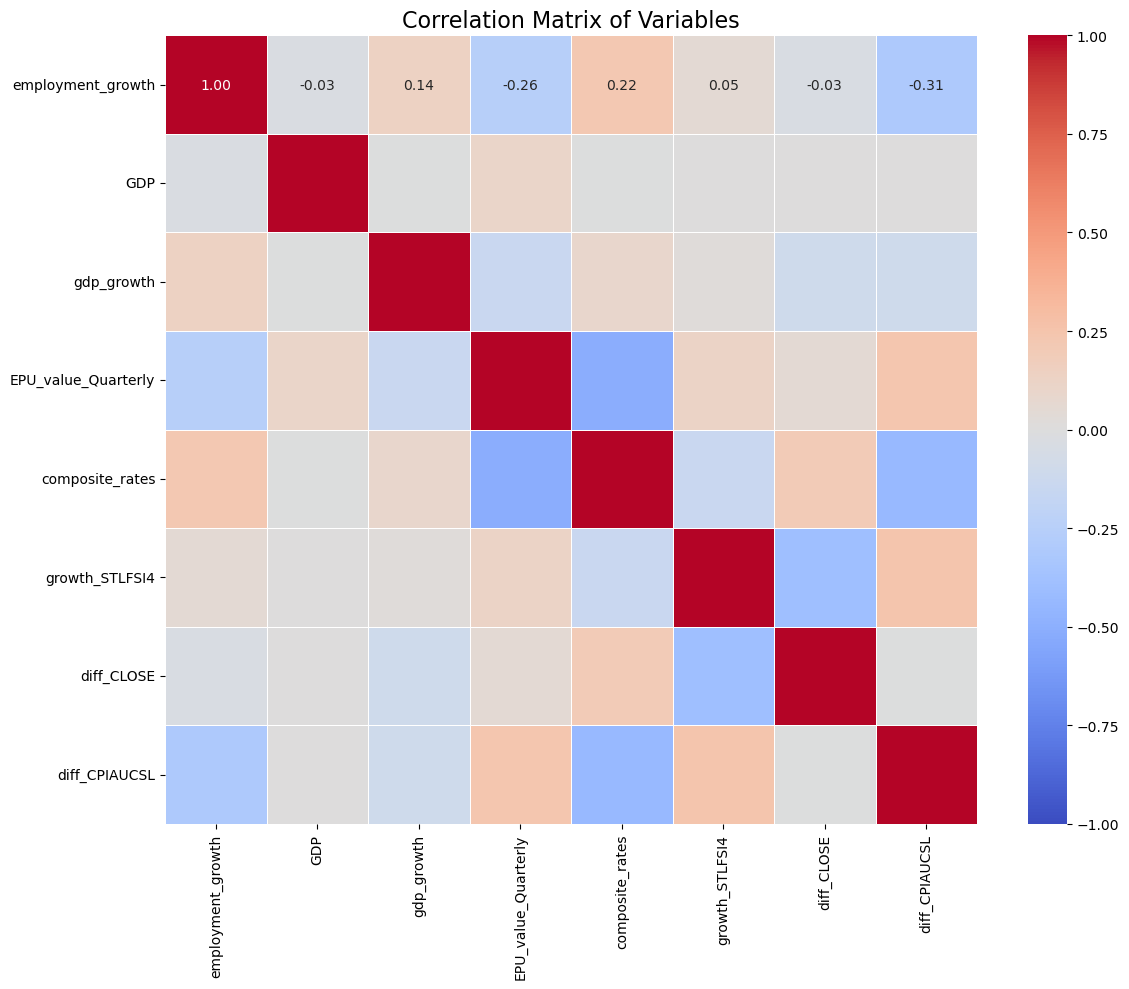

In [92]:
import seaborn as sns

# Calculate correlation matrix for variables in final_df
#mport matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numeric_df = final_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,              # Display correlation values
            cmap='coolwarm',         # Color map
            fmt='.2f',               # Format of the annotations
            linewidths=0.5,          # Width of the lines between cells
            vmin=-1, vmax=1)         # Range of values

# Set title
plt.title('Correlation Matrix of Variables', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [93]:
# Select only numeric columns
numeric_df = final_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Extract the upper triangle of the correlation matrix (excluding the diagonal)
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
corr_pairs = corr_matrix.where(mask).stack().reset_index()
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Rank the correlations from highest to lowest based on absolute correlation
sorted_corr = corr_pairs.sort_values(by='Correlation', ascending=False)

print(sorted_corr.to_string(index=False))

          Variable1           Variable2  Correlation
     growth_STLFSI4       diff_CPIAUCSL     0.249049
EPU_value_Quarterly       diff_CPIAUCSL     0.235444
  employment_growth     composite_rates     0.220362
    composite_rates          diff_CLOSE     0.202476
  employment_growth          gdp_growth     0.139706
EPU_value_Quarterly      growth_STLFSI4     0.123908
                GDP EPU_value_Quarterly     0.109183
         gdp_growth     composite_rates     0.086580
EPU_value_Quarterly          diff_CLOSE     0.050162
  employment_growth      growth_STLFSI4     0.049969
         gdp_growth      growth_STLFSI4     0.021938
                GDP       diff_CPIAUCSL     0.003003
                GDP          diff_CLOSE     0.002430
                GDP      growth_STLFSI4     0.002291
                GDP          gdp_growth    -0.001434
                GDP     composite_rates    -0.003507
         diff_CLOSE       diff_CPIAUCSL    -0.004738
  employment_growth                 GDP    -0.

In [91]:
final_df = pd.read_csv("final_data.csv")